#### Clean the data

In [3]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_sale_202311_202410.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify removal of duplicates
data.info()

# Save the cleaned data to a new CSV file
new_file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data.to_csv(new_file_path, index=False, encoding='utf-8')

print("Duplicates removed and cleaned data saved to a new CSV file successfully.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22511888 entries, 0 to 30547373
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   union_id             int64 
 1   gender               object
 2   race                 object
 3   season               object
 4   style_new            object
 5   root_category        object
 6   category             object
 7   kid_category         object
 8   collar               object
 9   sleeve               object
 10  sleeve_type          object
 11  fabric               object
 12  contour              object
 13  clothes_age          object
 14  clothes_length       object
 15  texture              object
 16  accessories          object
 17  technology_new       object
 18  color                object
 19  item_id              int64 
 20  shop_id              int64 
 21  sale_time            object
 22  cprice               int64 
 23  day_30_sales_volume  int64 
 24  pt                   i

In [4]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Count total rows in the dataset
total_rows_count = data.shape[0]

# Display the result
print("Total rows:", total_rows_count)

# Count distinct rows by considering all columns (to ensure row uniqueness)
distinct_rows_count = data.drop_duplicates().shape[0]

# Count distinct values in the 'union_id' column
distinct_union_id_count = data['union_id'].nunique()

# Count distinct values in the 'item_id' column
distinct_item_id_count = data['item_id'].nunique()

# Display the results
print("Distinct rows:", distinct_rows_count)
print("Distinct union_id values:", distinct_union_id_count)
print("Distinct item_id values:", distinct_item_id_count)

# Count distinct values in the 'style_new' column
distinct_style_new_count = data['style_new'].nunique()

# Display the result
print("Distinct style_new values:", distinct_style_new_count)

Total rows: 22511888
Distinct rows: 22511888
Distinct union_id values: 5530173
Distinct item_id values: 5530173
Distinct style_new values: 3687


#### Check styles
1. Clusters the data by style_new.
2. Counts the unique union_id and item_id values for each style.
3. Sorts the styles by the count of item_id and selects the top 10 styles.
4. Visualizes the results in a bar chart.

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

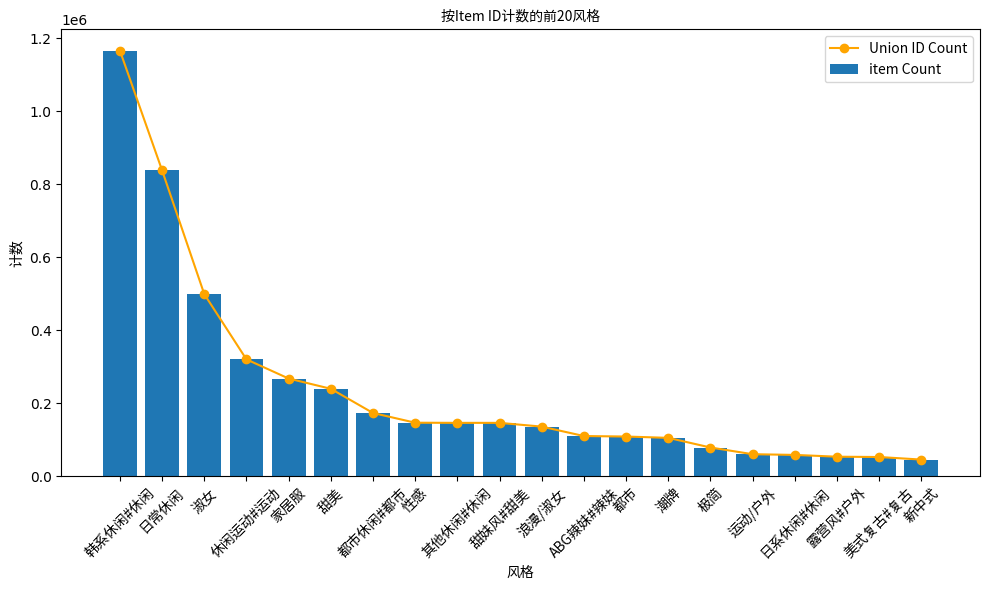

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# Set up the font properties for Chinese text
chinese_font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
chinese_font = FontProperties(fname=chinese_font_path)
mpl.rcParams['font.sans-serif'] = [chinese_font_path]  # Set default font for matplotlib
mpl.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly

# Group by 'style_new' and count unique 'union_id' and 'item_id' for each style
style_counts = data.groupby('style_new').agg(
    unique_union_id_count=('union_id', 'nunique'),
    item_id_count=('item_id', 'nunique')
).reset_index()

# Sort by 'item_id_count' to get the top 20 styles
top_10_styles = style_counts.sort_values(by='item_id_count', ascending=False).head(20)

# Plotting the top 20 styles
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_styles['style_new'], top_10_styles['item_id_count'], label='item Count')
ax.plot(top_10_styles['style_new'], top_10_styles['unique_union_id_count'], color='orange', marker='o', label='Union ID Count')

# Add labels and legend with Chinese font support
ax.set_xlabel('风格', fontproperties=chinese_font)  # 'Style' in Chinese
ax.set_ylabel('计数', fontproperties=chinese_font)  # 'Count' in Chinese
ax.set_title('按Item ID计数的前20风格', fontproperties=chinese_font)  # 'Top 20 Styles by item ID Count' in Chinese
ax.legend(prop=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
# Display the results in a table format
top_10_styles.columns = ['Style', 'Union ID Count', 'Item ID Count']
print(top_10_styles)

         Style  Union ID Count  Item ID Count
3563   韩系休闲#休闲         1166390        1166390
1445      日常休闲          838419         838419
2486        淑女          499425         499425
283    休闲运动#运动          320695         320695
925        家居服          268259         268259
2916        甜美          240143         240143
3464   都市休闲#都市          173901         173901
1294        性感          147253         147253
397    其他休闲#休闲          146863         146863
2808    甜妹风#甜美          146836         146836
2396     浪漫/淑女          136573         136573
23    ABG辣妹#辣妹          110751         110751
3378        都市          109412         109412
2663        潮牌          105778         105778
2033        极简           79350          79350
3363     运动/户外           60984          60984
1899   日系休闲#休闲           59060          59060
3502    露营风#户外           54148          54148
3219   美式复古#复古           53309          53309
1365       新中式           46258          46258


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load data
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Define columns to inspect and find the top 5 styles based on distinct note_id count
columns_to_check = [
    'gender', 'race', 'season', 'root_category', 'category', 'kid_category', 
    'collar', 'sleeve', 'sleeve_type', 'fabric', 'contour', 'clothes_age', 
    'clothes_length', 'texture', 'accessories', 'technology_new', 'color'
]
top_5_styles = data.groupby('style_new')['item_id'].nunique().nlargest(5).index
top_5_data = data[data['style_new'].isin(top_5_styles)]

# Load Chinese font
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# Create pie charts for each feature distribution in each top style
for style in top_5_styles:
    style_data = top_5_data[top_5_data['style_new'] == style]
    print(f"\nVisualizing distributions for Style: {style}")
    
    # Create a pie chart for each feature
    for col in columns_to_check:
        # Count distinct union_id for each category within the feature
        feature_distribution = style_data.groupby(col)['union_id'].nunique()
        
        # Plot pie chart for the feature distribution
        plt.figure(figsize=(6, 6))
        plt.pie(
            feature_distribution, 
            labels=feature_distribution.index, 
            autopct='%1.1f%%', 
            startangle=140,
            textprops={'fontproperties': chinese_font}
        )
        plt.title(f'{col} Distribution for Style: {style}', fontproperties=chinese_font)
        plt.show()
